# RESULTS OF ULTRASOUND LAB

### Answer 1 (Opening the files and Rendering the images)

### Calculation of the frequency.
 Frequency of the Transducer = 5.208 M Hz.
 Since we  know the Relation = c=frequency* wavelength.
 i.e. wavelength = c/frequency.
  
  calculating= 3e8/5.208 * e6 = 57.60(wavelength)
  
##### We have 4 samples per wavelength.
 
 so wavelength for 1 sample= 57.60/4 = 14.4 
 
 No calculating the Sampling Frequency = c/wavelength =  20.83 MHz 

524288


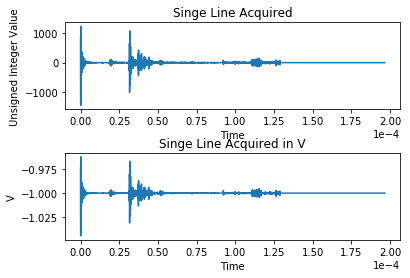

In [186]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

#we use a simple open command for the file (basic Python)
f = open('LabRFdata.bin','rb')   
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Line = np.fromfile(f,count=-1,dtype=np.int16)
L=len(Line)
f.close() #close the file

print(L)

#we will now populate an array for the time which we now is 1/20.83 MHz step for a total of 524288
x=np.arange(0,4096/20.83e6,1/20.83e6)  #start,stop,step


#now we plot only the first line acquired (524288 samples)
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,Line[:4096])
plt.title('Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#But this is in integers, in volts we need to calculate 2Vpp -> 65535=1V and 0=-1V
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.subplot(212)
plt.plot(x,LineF[:4096])
plt.title('Singe Line Acquired in V')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Now plotting the image using the ultrasound notebook.

128


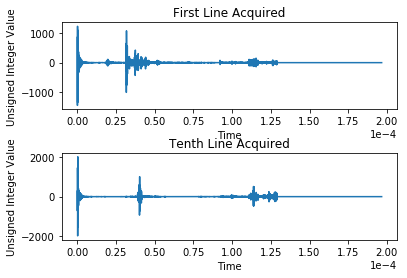

In [17]:
#we have first this command that initialize and matplotlib (library) for plotting and we specify that we want those plots inline in this notebook
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

#we use a simple open command for the file (basic Python)
f = open('LabRFdata.bin','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
x=np.arange(0,4096/20.83e6,1/20.83e6,)  #start,stop,step

Lines = np.fromfile(f,count=-1,dtype=np.int16)
Lines=Lines-np.mean(Lines)
LinesRF=Lines.reshape(128,4096).copy()  #columns,rows


f.close() #close the file
#we will now populate a 2D matrix for the lines
TL=len(Lines)/4096

#now we plot two lines acquired to double check (15000 samples)
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,LinesRF[0,:]) #first line
plt.title('First Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(212)
plt.plot(x,LinesRF[127,:]) #10th line
plt.title('Tenth Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

print(TL)


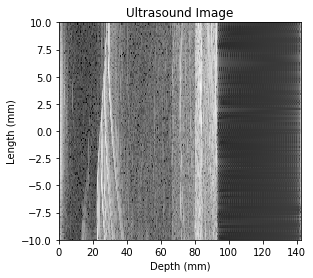

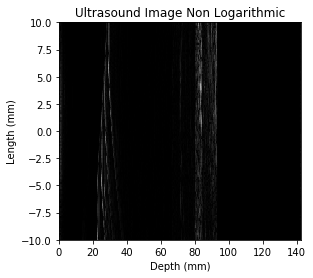

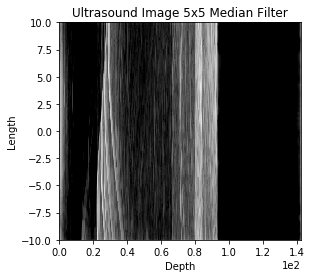

In [4]:
 #Compensating
h=x*1450
ffatt=np.exp(2*4.96*h)
LinesRFC=LinesRF*ffatt
LinesRFE=hilbert(LinesRFC)
LinesRFE=abs(LinesRFE)

#images need to be logarithmic so we can see all the contrast
Mx=LinesRFE.max()
Image=20*np.log10(LinesRFE/Mx)
ImageBW=LinesRFE

#the line axis
s=np.linspace(-10,10,128)
#Plotting
d=h/2*1000  #answer: why are we doing this here?
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, Image[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(32./5)  #this is because I know the image was 20mm in lenght so 26 lines=20mm or a ratio 10/13
plt.title('Ultrasound Image')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageBW[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(32./5)
plt.title('Ultrasound Image Non Logarithmic')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')


from scipy.signal import medfilt

#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 5x5 median filter
ImageF=medfilt(Image,5)

#Plotting
d=h/2*1000
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(32./5)
plt.title('Ultrasound Image 5x5 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


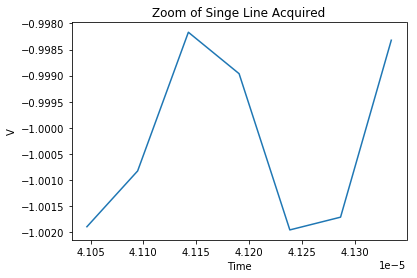

In [15]:
inx1=np.where(x>0.4103e-4)
inx1=inx1[0]
inx2=np.where(x>0.4135e-4)
inx2=inx2[0]
f = open('LabRFdata.bin','rb') 
Line = np.fromfile(f,count=-1,dtype=np.int16)
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.plot(x[inx1[0]:inx2[0]],LineF[inx1[100]:inx2[100]])
plt.title('Zoom of Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# (2) Calculation of the frequency ( using the graph above)


I have taken 1 cycle to calculate the frequency : 1/(4.103-4.124)e-5 = 5 Mhz


### More Precise calculation. ( Taking DFT of the whole signal and not just one line)

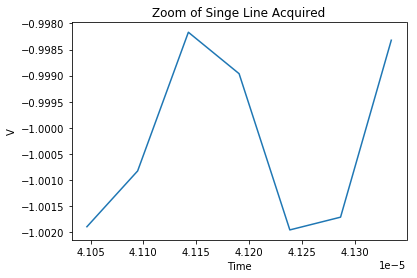

In [13]:
inx1=np.where(x>0.4103e-4)
inx1=inx1[0]
inx2=np.where(x>0.4135e-4)
inx2=inx2[0]
f = open('LabRFdata.bin','rb') 
Line = np.fromfile(f,count=-1,dtype=np.int16)
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.plot(x[inx1[0]:inx2[0]],LineF[inx1[100]:inx2[100]])
plt.title('Zoom of Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

262144
524288
The maximum is 0.000082 and it is found at index 125312 which is the frequency 4.978655e+06


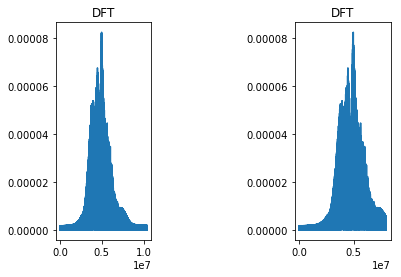

In [193]:
f = open('LabRFdata2.dat','rb')   # Windows

LineF-=np.mean(LineF)
L=524288
f=np.arange(0,20.83e6/2,20.83e6/L)
Y=np.fft.fft(LineF)
Pyy=abs(Y)/L

plt.subplots_adjust( wspace = 1.5 )
plt.subplot(121)
L2=len(Pyy)/2
print(L2)
plt.plot(f[:L2], Pyy[:L2])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

print(L)
inx=np.where(f>8e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Let's obtain the frequency at which the maximum is observed
#Remember we have a DFT which is mirrored, so we only work with half
PyyM=Pyy[:L2]
mm=np.argmax(PyyM) #this gives the index where the max is found
print("The maximum is %f and it is found at index %d which is the frequency %e" % (max(PyyM),mm,f[mm]))


### (3) Bandwidth of the signal
Taking 3dB down from both left and right side from the maximum frequency component.(i.e. 0.000082)
 
Bandwidth is about taking 3dB down from both the sides of the maximum.  

Calculating the 'V' = 3 = 20Log(V/0.000082)

The value we found of 'V' is = 0.00011582( Range from Max-V to Max+V)

Or to get 3dB we just multiply highest frequency component by 0.707 .
###### Bandwidth is from 3.51e6 to 6.42e6.(MHz)

### (4) Using Different Acquisition Parameters

As we know the speed of propogation of sound is directly propotional to the impedance of the tissue . If the impedance of the tissue is higher , more reflection will be there by the tissue. Thus we have to set speed of the sound such that we can see different contrast for different tissue as the wave penetrates the tissue.
       
 Acoustic Impedence = density of the material x speed of sound the materialBy saying we are using different acquisition parameters, we mean we are changing the speed of sound in the transmission . Ultrasound waves travel at a speed of sound c, given
by $$ c= (1/pk)^1/2  $$

where p= density and k = compressibility of the material . 

or $$ c= (m/p)^1/2 $$

where m= stiffness of the muscle tissue and p= density if water


by changing the processing panel i.e. ' Speed of sound' we know in water is approximately 1498 m/s . If we increase the speed of sound , more stiff muscle tissue will start to reflect the ultrasound waves whic may or may not reslt in better image .



###  (5) DICOM  file US-Mono-2-8-8x-execho.dcm |

In [160]:
# We are first getting the metadata related to the US-Mono-2-8-8x-execho.dcm 

%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('US-Mono-2-8-8x-execho.dcm')
# Let's print all the Metadta here
print(RefDs)



(0008, 0000) Group Length                        UL: 342
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TTE', '0001']
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19941105.134500.2.101
(0008, 0020) Study Date                          DA: '1994.11.05'
(0008, 0023) Content Date                        DA: '1994.11.05'
(0008, 0030) Study Time                          TM: '13:45:00'
(0008, 0060) Modality                            CS: 'US'
(0008, 0070) Manufacturer                        LO: 'Acme Products'
(0008, 0090) Referring Physician's Name          PN: 'Anonymized'
(0008, 1030) Study Description                   LO: 'Exercise Echocardiogram'
(0008, 103e) Series Description                  LO: 'Post-Stress'
(0008, 2120) Stage Name                          SH: 'Post-Exercise'
(0008, 2122) Stage Number                        IS: '2'
(0008, 2124) Nu

[0, 127, 0, 119]

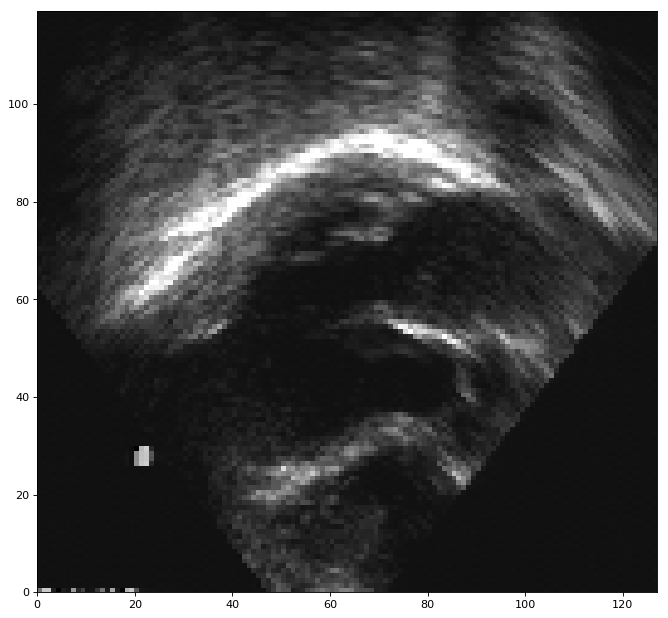

In [183]:
ConstPixelDims = (int(RefDs.NumberofFrames),int(RefDs.Rows), int(RefDs.Columns)) # introducing 3rd dimension as number of frames which are 8 in the ultrasound file
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('US-Mono-2-8-8x-execho.dcm')
ArrayDicom[:,:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(y, x, ArrayDicom[1,:,:]) # opening one frame only i.e 1st
plt.axis([y.min(),y.max(),x.min(),x.max()])

### (6) Difference between the Data to render the image and DICOM.

The main difference is that the data to render the image is just different unsigned integer values of the voltages at different time periods. The image will be formed based on these values at different time intervals . Whereas, in a dicom we have data of each pixel that eventually forms the image . In Dicom we have data of each pixels in bits which tells the colour of the pixel. 
We use DICOM when its helpful for us to plot the image directly fromm the raw data we have in 'dcm' format. We can directly render the images rather than doing all variation on the raw data such as compensating and applying transform. DICOM helps us to render images directly from the LAB and provides all the necessary data associated with image(metadata) . 


### (7) Advantages / Disadvantages of using raw data over DICOM


Raw data may be useful for some technicians as it gives unsigned integer values of  voltages for a series of time period. So  raw data might be very useful for analysis of the signal which we obtained from a particular modality. Whereas DICOM data are just pixels having different bits of information mainly employed for image formation. Only image analysis can be done using a DICOM data sheet. Whereas, raw data can always give the insight of the signal we received which will be eventually used for image formation. 